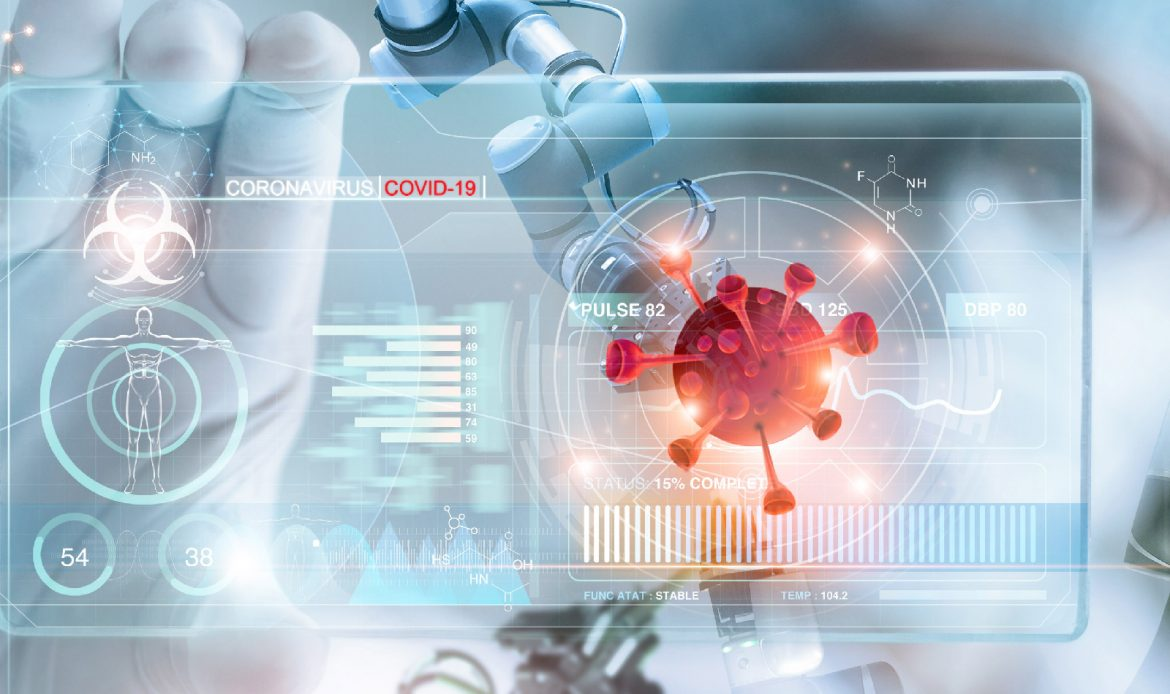

In [90]:
from IPython.display import Image
Image(filename="C:/Users/julik/Downloads/Covid-1170x694.jpg", width=1170, height=400)

Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 15 May 2020), this leads to a total of 300K+ Deaths across the globe, including 159K+ deaths alone in Europe. Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time. In this notebook, the main focus is to analyze the spread trend of this virus all over the world.

# 💡Project Description:
This project involves analyzing, visualizing, and predicting the trends of COVID-19 cases using Python. It leverages real-world COVID-19 data to study patterns in infection, recovery, and mortality rates globally and regionally (specifically in India). The goal is to extract meaningful insights from the data and make short-term predictions.

# Dataset Info:
* The dataset is in CSV format and contains information about:
  * Confirmed Cases
  * Deaths
  * Recoveries
  * Data separated by countries and regions
* The data includes global statistics and country-specific breakdowns, particularly for India.


# Problem Statement:
Using the provided dataset, the project focuses on:

* Visualizing the Impact: Analyze and plot trends in the number of confirmed cases, recoveries, and deaths over time.
* Trend Analysis: Identify patterns in the rate of infections and recoveries globally and regionally.
* Predictions: Build a predictive model to forecast the number of cases for the next week based on current trends.

# Technologies and Tools to Use:
1.Data Handling:
* Use Pandas for data manipulation and cleaning.
* Merge multiple datasets if required and preprocess them.
  
2.Visualization:
* Use Plotly for creating interactive and dynamic visualizations (e.g., line plots, bar charts, pie charts).
* Show country-wise comparisons, trends over time, and region-specific insights.
  
3.Time-Series Predictions:
* Use the Facebook Prophet Library to build time-series forecasting models.
* Predict the number of cases (confirmed, recovered, or deaths) for the next 7 days.

# Steps to Implement
1.Data Loading and Cleaning:
* Load the CSV dataset using Pandas.
* Handle missing data and standardize date formats.
* Filter data for global trends and region-specific (India) insights.

2.Exploratory Data Analysis (EDA):
* Explore the dataset for trends in infection, recovery, and mortality.
* Identify spikes or anomalies in data (e.g., sudden increases in cases).

3.Visualizations:
* Create interactive visualizations for:
* Daily and cumulative cases globally.
* Comparisons between countries/regions.
* Recovery rates and death trends.
* Specific focus on India.

4.Prediction Models:
* Prepare time-series data for confirmed cases, deaths, and recoveries.
* Use Prophet to predict trends for the next week.
* Visualize predicted trends with Plotly.

5.Insights and Reporting:
* Summarize insights derived from the analysis.
* Highlight predictions and compare them to real-world observations.

# Outcome
By the end of the project, you will have:

* A comprehensive report with interactive visualizations of COVID-19 trends.
* Short-term forecasts for case numbers based on the analysis.
* Insights into the impact of the pandemic globally and in specific regions.

# 1. Import Required Libraries

In [91]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from prophet import Prophet


import warnings
warnings.filterwarnings("ignore")

In [92]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


# 2. Load and Explore the Dataset

#Importing the dataset
data = pd.read_csv('covid 19.csv')
data.head()

In [93]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Province/State        0
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
Mortality Rate    10059
Recovery Rate     10059
dtype: int64


In [94]:
# Dataset structure
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  49068 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
 10  Mortality Rate  39009 non-null  float64       
 11  Recovery Rate   39009 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 4.5+ MB
None


# 3. Data Cleaning

In [95]:
# Fill missing values (if applicable)
data.fillna(0, inplace=True)

In [96]:
# Ensure the "Date" column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [97]:
# Verify cleaned data
print("\nCleaned Data Overview:")
print(data.head())


Cleaned Data Overview:
  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0              0    Afghanistan  33.93911  67.709953 2020-01-22          0   
1              0        Albania  41.15330  20.168300 2020-01-22          0   
2              0        Algeria  28.03390   1.659600 2020-01-22          0   
3              0        Andorra  42.50630   1.521800 2020-01-22          0   
4              0         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  Mortality Rate  \
0       0          0       0  Eastern Mediterranean             0.0   
1       0          0       0                 Europe             0.0   
2       0          0       0                 Africa             0.0   
3       0          0       0                 Europe             0.0   
4       0          0       0                 Africa             0.0   

   Recovery Rate  
0            0.0  
1            0.0  
2            0.0  
3   

# 4. Exploratory Data Analysis (EDA)

# 4.1 Global Trends Visualization

In [98]:
# Aggregate global trends by date
global_trends = data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()


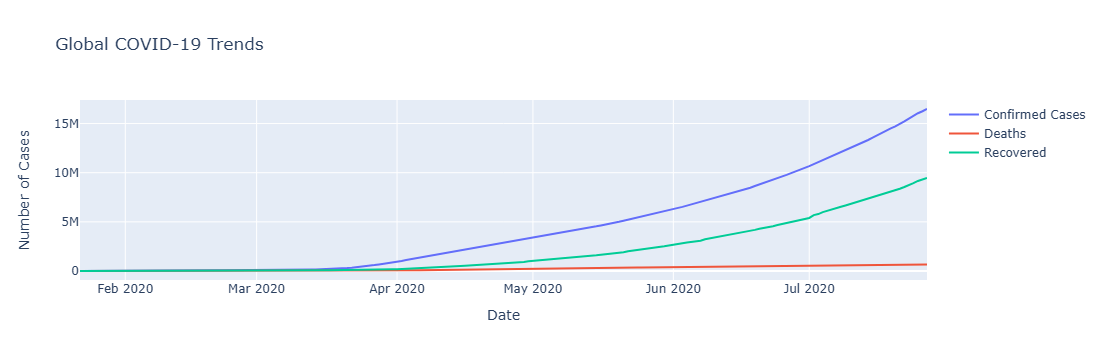

In [99]:
# Line Plot for Global Trends
fig = go.Figure()
fig.add_trace(go.Scatter(x=global_trends['Date'], y=global_trends['Confirmed'], mode='lines', name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=global_trends['Date'], y=global_trends['Deaths'], mode='lines', name='Deaths'))
fig.add_trace(go.Scatter(x=global_trends['Date'], y=global_trends['Recovered'], mode='lines', name='Recovered'))
fig.update_layout(title="Global COVID-19 Trends", xaxis_title="Date", yaxis_title="Number of Cases")
fig.show()

# 4.2 Country-Specific Analysis (e.g., India)

In [100]:
# Filter data for a specific country (India)
india_data = data[data['Country/Region'] == 'India']

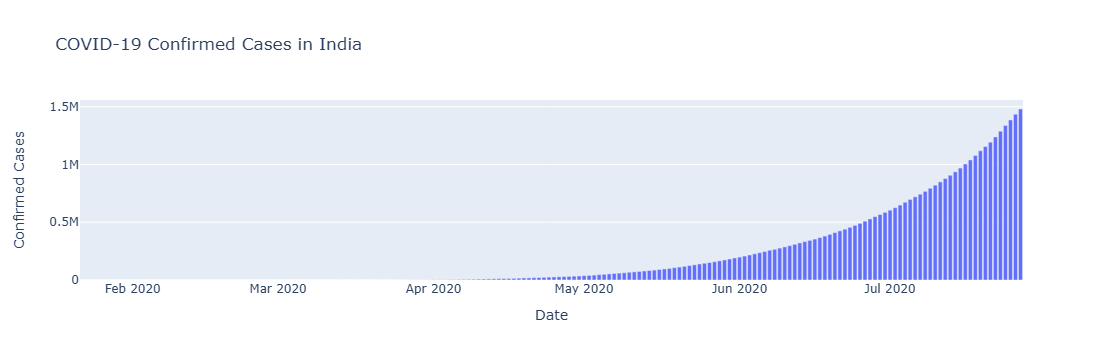

In [101]:
# Plot India's confirmed cases over time
fig = px.bar(india_data, x='Date', y='Confirmed', title='COVID-19 Confirmed Cases in India', labels={'Confirmed': 'Confirmed Cases'})
fig.show()

# 4.3 Mortality and Recovery Rates

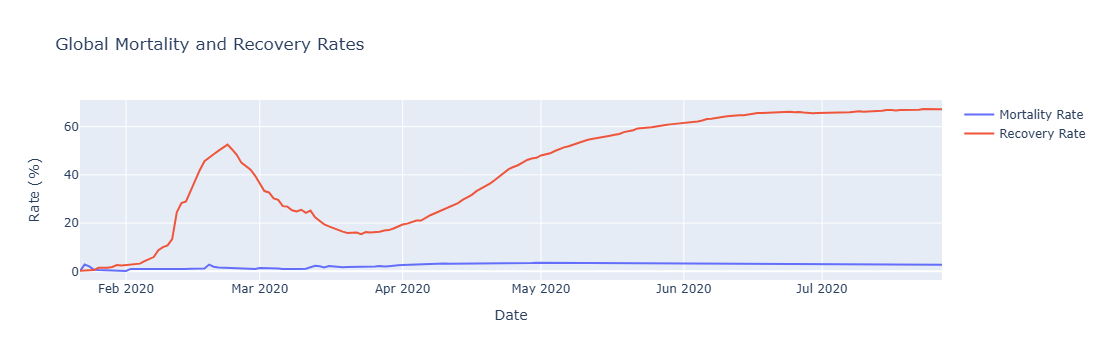

In [102]:
# Add mortality and recovery rates
data['Mortality Rate'] = (data['Deaths'] / data['Confirmed']) * 100
data['Recovery Rate'] = (data['Recovered'] / data['Confirmed']) * 100

# Plot mortality and recovery rates globally
rates = data.groupby('Date')[['Mortality Rate', 'Recovery Rate']].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=rates['Date'], y=rates['Mortality Rate'], mode='lines', name='Mortality Rate'))
fig.add_trace(go.Scatter(x=rates['Date'], y=rates['Recovery Rate'], mode='lines', name='Recovery Rate'))
fig.update_layout(title="Global Mortality and Recovery Rates", xaxis_title="Date", yaxis_title="Rate (%)")
fig.show()

# 5. Time-Series Prediction

# 5.1 Prepare Data for Prediction

In [103]:
forecast_data = global_trends[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})
print("\nForecasting Data:")
print(forecast_data.head())


Forecasting Data:
          ds     y
0 2020-01-22   555
1 2020-01-23   654
2 2020-01-24   941
3 2020-01-25  1434
4 2020-01-26  2118


# 5.2 Fit and Predict Using Prophet

17:26:10 - cmdstanpy - INFO - Chain [1] start processing
17:26:11 - cmdstanpy - INFO - Chain [1] done processing


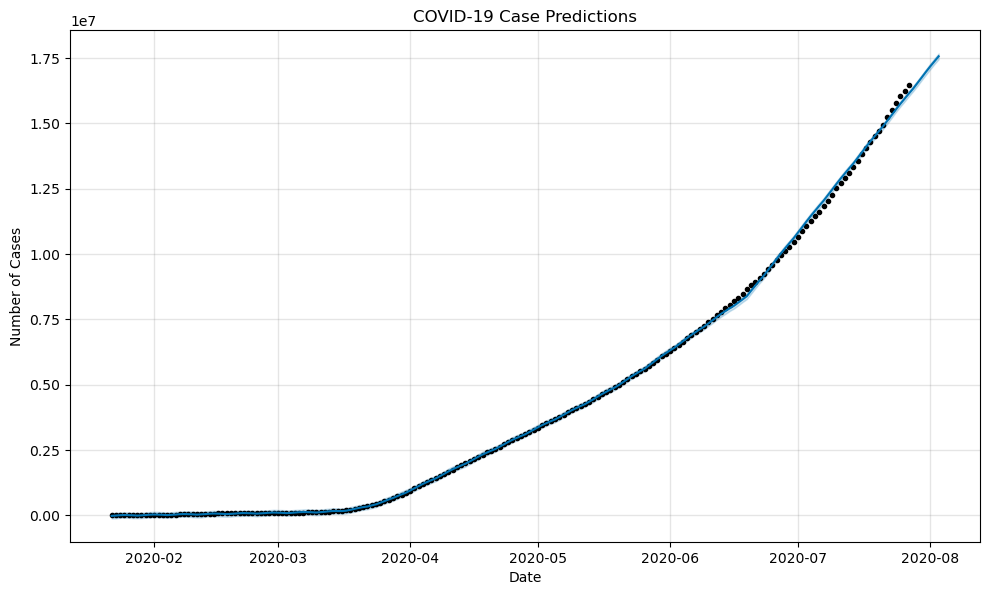

In [104]:
# Initialize and fit the model
model = Prophet()
model.fit(forecast_data)

# Make future predictions
future = model.make_future_dataframe(periods=7)  # Predict next 7 days
forecast = model.predict(future)

# Plot predictions
fig = model.plot(forecast)
plt.title("COVID-19 Case Predictions")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

# 5.3 Visualize Predicted Trends

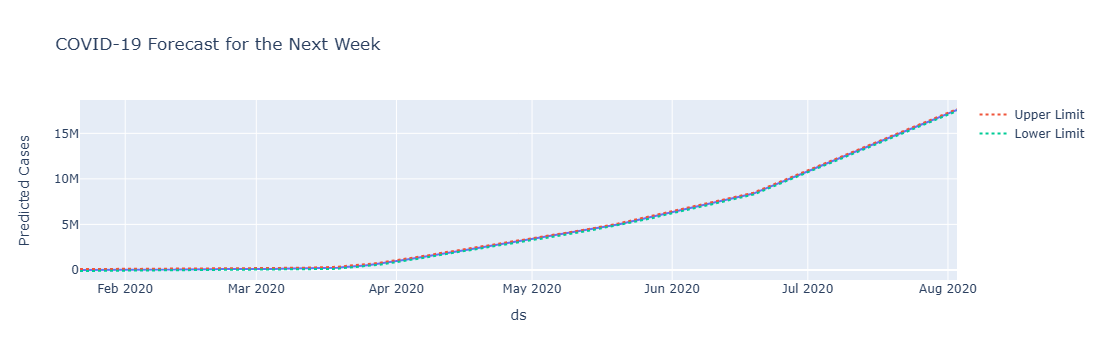

In [105]:
fig = px.line(forecast, x='ds', y='yhat', title='COVID-19 Forecast for the Next Week', labels={'yhat': 'Predicted Cases'})
fig.add_scatter(x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', name='Upper Limit', line=dict(dash='dot'))
fig.add_scatter(x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', name='Lower Limit', line=dict(dash='dot'))
fig.show()

# 6. Insights and Reporting

In [106]:
# Insights on global trends
max_confirmed = global_trends['Confirmed'].max()
date_of_max = global_trends[global_trends['Confirmed'] == max_confirmed]['Date'].iloc[0]

print(f"Highest number of global confirmed cases: {max_confirmed} on {date_of_max}")

# Insights on India-specific data
max_cases_india = india_data['Confirmed'].max()
date_of_max_india = india_data[india_data['Confirmed'] == max_cases_india]['Date'].iloc[0]

print(f"Highest number of confirmed cases in India: {max_cases_india} on {date_of_max_india}")

Highest number of global confirmed cases: 16480485 on 2020-07-27 00:00:00
Highest number of confirmed cases in India: 1480073 on 2020-07-27 00:00:00


# Conclusion:

The COVID-19 pandemic has underscored the importance of global cooperation, timely public health responses, and addressing social inequalities. It has revealed vulnerabilities in our healthcare systems and highlighted the need for preparedness against future outbreaks. As we move forward, it is crucial to learn from this crisis, implement strategies that promote resilience, and ensure equitable access to healthcare for all. The lessons learned during this unprecedented time will help shape a healthier and more prepared world for future generations.

------------------------------------------------------------------------------THANKYOU---------------------------------------------------------------------------------------